# Lab 4 - ML Experiments in Python
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu)) (based on lab from Guanghua Chi)
- **Date:** 19 February 2020
- **Course:** INFO 251: Applied machine learning

### Learning Objectives:
By the end of the lab, you will be able to:

* Random numbers, training and test data
* Built-in methods for cross validation
* Compare different measures of performance
* Vectorized computation

### Topics:
1. train test split
2. kfold
3. cross validation
4. model evaluation

### Notes:
1. Implement several algorithms from scratch in PS3.
2. If your nearest neighbor algorithm takes hours to run, talk with your teammates or come to my office hour.

### References: 
 * [The Need for Speed](https://lectures.quantecon.org/py/need_for_speed.html)
 * [train test split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
 * [k-fold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
 * [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [3]:
import pandas as pd
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline

# 0. for loop vs vectorized computation

In [10]:
# example of 'for loop'
N = 200
random_list = np.random.rand(N, 1)
intercept = 0.5
coeff = 1.0
result = np.zeros(N)
t_start = time.time()
for i in range(N):
    result[i] = intercept + coeff * random_list[i]
t_end = time.time()
t1 = t_end - t_start

print('The result is {} computed in {} seconds'.format(result, t1))


The result is [1.40779603 0.73440886 0.76131051 1.18511212 0.85212045 1.16977873
 1.33324854 1.41878543 0.88291826 0.57504987 0.50375818 0.5567301
 0.93970619 1.04935869 0.64999761 1.4838898  0.96642667 1.00807123
 0.99999507 1.14959467 1.46246439 1.23208862 1.03084883 0.94629051
 0.59943066 1.16964806 0.88894951 0.56396986 0.78181188 0.82522876
 1.09677529 0.53436478 0.94353794 0.55688302 1.07646931 0.53908297
 0.62185435 0.56913608 1.41991706 0.6702133  1.09826455 1.27683391
 0.7036391  0.91256497 0.98070435 0.96636845 0.59208072 1.23207643
 0.90025477 0.86342416 0.80330143 1.45234102 1.14874482 0.81964082
 1.33336721 0.94391847 1.24736158 1.09556043 0.88837427 1.29059858
 0.57337978 0.67630695 1.04269539 0.56007258 0.52467409 0.84953048
 0.5782155  0.5050187  0.56693142 0.96059161 0.76315703 1.12938464
 1.00094506 0.93789096 1.27076526 0.93343241 1.09746336 0.9837607
 0.94048272 0.98721089 0.69676394 0.55230132 1.28306865 0.79978062
 1.11498346 0.66461978 0.76663812 0.75272978 0.829

In [11]:
# example of 'for loop'
t_start = time.time()
result2 = intercept + coeff * random_list
t_end = time.time()
t2 = t_end - t_start

print('The result is {} computed in {} seconds'.format(result2, t2))


The result is [[1.40779603]
 [0.73440886]
 [0.76131051]
 [1.18511212]
 [0.85212045]
 [1.16977873]
 [1.33324854]
 [1.41878543]
 [0.88291826]
 [0.57504987]
 [0.50375818]
 [0.5567301 ]
 [0.93970619]
 [1.04935869]
 [0.64999761]
 [1.4838898 ]
 [0.96642667]
 [1.00807123]
 [0.99999507]
 [1.14959467]
 [1.46246439]
 [1.23208862]
 [1.03084883]
 [0.94629051]
 [0.59943066]
 [1.16964806]
 [0.88894951]
 [0.56396986]
 [0.78181188]
 [0.82522876]
 [1.09677529]
 [0.53436478]
 [0.94353794]
 [0.55688302]
 [1.07646931]
 [0.53908297]
 [0.62185435]
 [0.56913608]
 [1.41991706]
 [0.6702133 ]
 [1.09826455]
 [1.27683391]
 [0.7036391 ]
 [0.91256497]
 [0.98070435]
 [0.96636845]
 [0.59208072]
 [1.23207643]
 [0.90025477]
 [0.86342416]
 [0.80330143]
 [1.45234102]
 [1.14874482]
 [0.81964082]
 [1.33336721]
 [0.94391847]
 [1.24736158]
 [1.09556043]
 [0.88837427]
 [1.29059858]
 [0.57337978]
 [0.67630695]
 [1.04269539]
 [0.56007258]
 [0.52467409]
 [0.84953048]
 [0.5782155 ]
 [0.5050187 ]
 [0.56693142]
 [0.96059161]
 [0.76

### simple example

In [12]:
x = np.arange(1e6)
y = np.arange(1e6) * 2

[0.00000e+00 1.00000e+00 2.00000e+00 ... 9.99997e+05 9.99998e+05
 9.99999e+05]


### for loop

In [25]:
def sum_product(x, y):
    """Return the sum of x[i] * y[i] for all indices.

    >>> sum_product(x, y)
    6.66665666666e+17

    """
    # using for loop here
    s = 0
    for i in range(len(x)):
        s += x[i] * y[i]
    return s

In [26]:
t_start = time.time()
r = sum_product(x, y)
print(r)
t_end = time.time()
t1 = t_end - t_start
print("Time: {:.5f}s".format(t1))

6.66665666666e+17
Time: 0.59240s


### vectorized computation

In [3]:
x * y

array([0.000000e+00, 2.000000e+00, 8.000000e+00, ..., 1.999988e+12,
       1.999992e+12, 1.999996e+12])

In [4]:
t_start = time.time()
# using vectorized computation here
# add your code

r = np.sum(x * y)

print(r)
t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))

6.66665666667e+17
Time: 0.00935s


In [29]:
print("{:.0f} times faster".format(t1 / t2))

65 times faster


In [6]:
t_start = time.time()
# using vectorized computation here
# add your code

r = np.dot(x, y)

print(r)
t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))

6.666656666669966e+17
Time: 0.00148s


### complex example

We want to maximize a function $f$ of two variables $(x,y)$:  $f(x, y) = \frac{cos(x^2 + y^2)}{1 + x^2 + y^2}$

To maximize it, we’re going to use a naive grid search:
1. Evaluate $f$ for all $(x,y)$ in a grid on the square
2. Return the maximum of observed values

In [17]:
def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

In [18]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

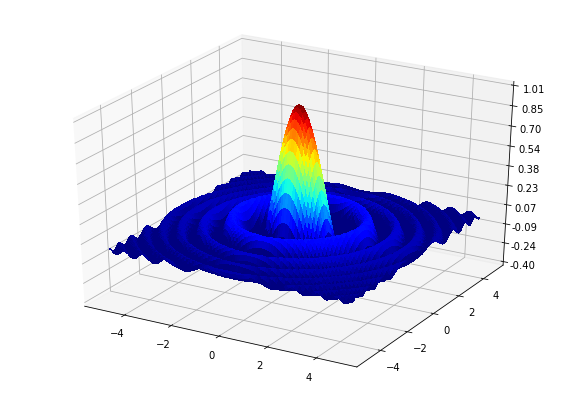

In [31]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet(Z),
                       linewidth=0, antialiased=False, shade=False)

# Customize the z axis.
ax.set_zlim(-0.4, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

### for loop

In [32]:
grid = np.linspace(-3, 3, 2000)
m = -np.inf
t_start = time.time()
for x in grid:
    for y in grid:
        z = f(x, y)
        if z > m:
            m = z
print(m)
t_end = time.time()
t1 = t_end - t_start
print("Time: {:.5f}s".format(t1))

0.999995495507
Time: 21.70427s


### vertorized computation

In [33]:
x, y = np.meshgrid(grid, grid)
t_start = time.time()
# vectorized computation
# add your code here
Z= f(x, y)
t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))

0.999995495507
Time: 0.30335s


In [34]:
print("{:.0f} times faster".format(t1 / t2))

72 times faster


In [18]:
a = [[1,2,3],
     [3,4,5],
     [4,5,6]]

In [20]:
b = [[12,2,3],
     [33,4,5],
     [4,54,6]]

In [21]:
np.array(a) - np.array(b)

array([[-11,   0,   0],
       [-30,   0,   0],
       [  0, -49,   0]])

In [23]:
np.array(a)[0,:]

array([1, 2, 3])

###  Exercise: for each point, calculate its closest point

In [25]:
points = np.random.rand(100,2)
print(points.shape)

(100, 2)


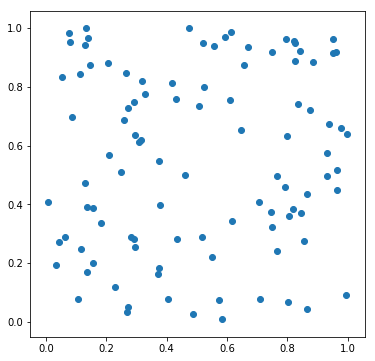

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(points[:,0], points[:,1])

In [ ]:
# don't use the following code !!!
for i in range(len(points)):
    lat, lon = points[i,:]
    dists = []
    for j in range(len(points)):
        # do not compare with itself
        if j != i:
            lat_2, lon_2 = points[j,:]
            dists.append(np.sqrt((lat - lat_2) ** 2 + (lon - lon_2) ** 2))
    closest_idx = np.argmin(dists)
    print(closest_idx)

In [37]:
for p in points:
    print(p)
    break

[0.15405747 0.20214918]


In [32]:
for p in points:
    a = np.sum((points - p)**2, axis=1) ** .5
    break

In [36]:
np.argmin(a)

AxisError: axis 2 is out of bounds for array of dimension 1

In [34]:
a = np.array([1,2,3,4,0.5,10])

In [35]:
np.argmin(a)

4

In [ ]:
# how to use vectorized computation?

# 1. Random numbers, training and test data

In [19]:
auto_df = pd.read_csv('Auto.csv')
auto_df = auto_df[auto_df.horsepower != '?']
auto_df['horsepower'] = auto_df['horsepower'].astype('float')

- mpg: miles per gallon
- cylinders: Number of cylinders between 4 and 8
- displacement: Engine displacement (cu. inches)
- horsepower: Engine horsepower
- weight: Vehicle weight (lbs.)
- acceleration: Time to accelerate from 0 to 60 mph (sec.)
- year: Model year (modulo 100)
- origin: Origin of car (1. American, 2. European, 3. Japanese)
- name: Vehicle name

In [3]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Use `np.random.choice` to generate random numbers

In [5]:
train_idx = np.random.choice(range(len(auto_df)), int(len(auto_df) * .8), replace=False)
test_idx = list(set(range(len(auto_df))) - set(list(train_idx)))

Let's predict mpg using other variables.

In [6]:
train_v_names = list(set(auto_df.columns.tolist()) - set(['mpg', 'name']))
train_x = auto_df.loc[train_idx, train_v_names]
train_y = auto_df.loc[train_idx, 'mpg']
test_x = auto_df.loc[test_idx, train_v_names]
test_y = auto_df.loc[test_idx, 'mpg']

In [7]:
train_x.shape

(313, 7)

In [8]:
test_x.shape

(79, 7)

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(auto_df[train_v_names], auto_df['mpg'],
                                                    test_size=0.2, random_state=42, shuffule=True)

/Applications/anaconda/envs/py3k/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


`sklearn.model_selection.train_test_split(*arrays, **options)`[link](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
Parameteres:
* test_size : float, int, None, optional
    * If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples.
* train_size : float, int, or None
* random_state : int, seed to generate random number
* shuffle : boolean, optional (default=True)
    * Whether or not to shuffle the data before splitting.

In [10]:
from sklearn.linear_model import Ridge

In [11]:
clf = Ridge()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
s = clf.score(X_test, y_test)
print("R square: {:.2f}".format(s))

R squre: 0.79


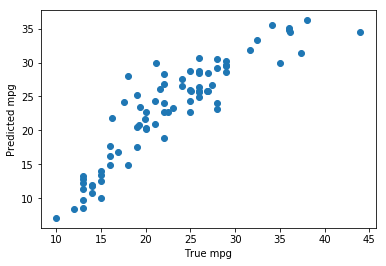

In [12]:
plt.scatter(y_test, y_predict)
plt.xlabel('True mpg')
plt.ylabel('Predicted mpg')

# 2. Built-in methods for cross validation

In [13]:
import sklearn

In [14]:
sklearn.__version__

'0.19.0'

In [15]:
from sklearn.model_selection import KFold

In [18]:
X = auto_df[train_v_names].as_matrix()
Y = auto_df['mpg'].as_matrix()

In [20]:
kf = KFold(n_splits=5)
r2_all = []
for train_idx, test_idx in kf.split(X):
    train_x = X[train_idx]
    train_y = Y[train_idx]
    test_x = X[test_idx]
    test_y = Y[test_idx]
    clf = Ridge()
    clf.fit(train_x, train_y)
    s = clf.score(test_x, test_y)
    r2_all.append(s)
    print(s)
print("average R square: {:.2f}".format(np.mean(r2_all)))

0.557055868633
0.689493679637
0.822153740175
0.679782865781
0.224060517631
average R square: 0.59


# 3. Compare different measures of performance
[model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
clf = Ridge()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [23]:
mean_squared_error(y_test, y_predict)

10.702784548967244